# Project - Noise removal from images - Multiclass


This would be a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

Here we'll build a system that removes noise from images. It will take as input a noisy digit image, and it will output a clean digit image, represented as an array of pixel intensities, just like the MNIST images.

Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

**Objectives:**

For this example we'll be adding noise to our MNIST dataset. We will be generating random integer using randint() and adding to original image. To do the following you can use this code:

## Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Step 2: Fetch the Data

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the dataset.

In [5]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target,i) for i, target in enumerate(mnist.target[60000:])]))[:,1]
  
    #getting train data
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    
    #getting test data
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, cache = True)

In [6]:
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

In [13]:
type(mnist)

sklearn.utils.Bunch

In [16]:
mnist.data[60000:].shape

(10000, 784)

In [17]:
mnist.target[60000:].shape

(10000,)

In [18]:
mnist.target[:60000].shape

(60000,)

In [19]:
mnist.data[:60000].shape

(60000, 784)

In [21]:
mnist.data.shape

(70000, 784)

In [22]:
mnist.target.shape

(70000,)

### Separating Dependent and Independent Features

In [7]:
X, y = mnist['data'], mnist['target']

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

## Step 3: View an Image

To view the image of a single digit,all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.

In [29]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Grab an instance

In [25]:
some_digit = X[36000]  # Selecting the 36,000th image
some_digit_image = some_digit.reshape(28,28) # Reshaping it to get the 28x28 pixels, since in mnist the images are 28*28

In [27]:
some_digit_image.shape

(28, 28)

### Diaplay using plt.imshow()

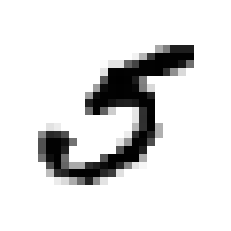

In [35]:
plt.imshow(some_digit_image,
           cmap = matplotlib.cm.binary,
           interpolation = 'nearest')
plt.axis('Off')
plt.show()

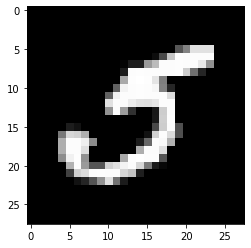

In [45]:
plt.imshow(255-some_digit_image, 
           cmap = matplotlib.cm.binary, 
           interpolation="nearest")

In [37]:
some_digit_image.shape

(28, 28)

In [39]:
X[36000].shape

(784,)

In [40]:
X.shape

(70000, 784)

In [43]:
y[36000]

5

In [44]:
y.shape

(70000,)

## Step 4: Split the Data into train and test set

We need to split the data into test and train data. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)



In [46]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [47]:
X_train.shape

(60000, 784)

In [48]:
X_test.shape

(10000, 784)

In [49]:
y_train.shape

(60000,)

In [50]:
y_test.shape

(10000,)

In [51]:
type(X)

numpy.ndarray

#### Explaining the slicing of numpy array 

In [52]:
a = np.random.random(20)

In [53]:
a.shape

(20,)

In [54]:
a.reshape(5,4)

array([[0.73803409, 0.16837809, 0.48705339, 0.51333639],
       [0.43739085, 0.833435  , 0.96295533, 0.27281938],
       [0.97028276, 0.30029404, 0.32196087, 0.99252452],
       [0.57811642, 0.25050601, 0.85094505, 0.85634146],
       [0.51306757, 0.75976229, 0.81926635, 0.86594484]])

In [55]:
a

array([0.73803409, 0.16837809, 0.48705339, 0.51333639, 0.43739085,
       0.833435  , 0.96295533, 0.27281938, 0.97028276, 0.30029404,
       0.32196087, 0.99252452, 0.57811642, 0.25050601, 0.85094505,
       0.85634146, 0.51306757, 0.75976229, 0.81926635, 0.86594484])

In [73]:
a[:].shape

(19,)

In [69]:
a.shape

(20,)

In [72]:
b = a.reshape(5,4)

In [74]:
b.shape

(5, 4)

In [76]:
b

array([[0.73803409, 0.16837809, 0.48705339, 0.51333639],
       [0.43739085, 0.833435  , 0.96295533, 0.27281938],
       [0.97028276, 0.30029404, 0.32196087, 0.99252452],
       [0.57811642, 0.25050601, 0.85094505, 0.85634146],
       [0.51306757, 0.75976229, 0.81926635, 0.86594484]])

In [81]:
b[:4]

array([[0.73803409, 0.16837809, 0.48705339, 0.51333639],
       [0.43739085, 0.833435  , 0.96295533, 0.27281938],
       [0.97028276, 0.30029404, 0.32196087, 0.99252452],
       [0.57811642, 0.25050601, 0.85094505, 0.85634146]])

In [84]:
b[:-1]

array([[0.73803409, 0.16837809, 0.48705339, 0.51333639],
       [0.43739085, 0.833435  , 0.96295533, 0.27281938],
       [0.97028276, 0.30029404, 0.32196087, 0.99252452],
       [0.57811642, 0.25050601, 0.85094505, 0.85634146]])

In [82]:
b[4:]

array([[0.51306757, 0.75976229, 0.81926635, 0.86594484]])

In [83]:
b[-1:]

array([[0.51306757, 0.75976229, 0.81926635, 0.86594484]])

## Step 5: Shuffle the Train Set
Also we need to shuffle our training data so that it ensures that we don't miss out any digit in a cross validation fold.



In [92]:
np.random.seed(42)

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [88]:
type(shuffle_index)

numpy.ndarray

In [89]:
shuffle_index.shape

(60000,)

In [90]:
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [91]:
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

**Stuck in explaination of operation on numpy**

In [112]:
a = np.ones([5,4], dtype = int)
a

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [102]:
c = np.random.permutation(20)

In [103]:
d = c.reshape(5,4)
d

array([[ 5, 17,  1, 18],
       [ 6,  2, 11,  0],
       [10, 14, 15, 19],
       [ 8, 13,  4,  9],
       [ 3, 16, 12,  7]])

In [116]:
#a = a[d]

## Step 6: Add noise in the existing image

Since KNN take a lot of time, we are trimming it here

In [117]:
X_train = X_train [:30000]
y_train = y_train [:30000]

X_test = X_test [:30000]
y_test = y_test [:30000]

**Adding Noise**

In [118]:
import numpy.random as rnd

noise_train = rnd.randint(0,100,(len(X_train),784))

X_train_mod = X_train + noise_train

noise_test = rnd.randint(0,100,(len(X_test),784))

X_test_mod = X_test + noise_test


y_train_mod = X_train
y_test_mod = X_test


##### rnd.randint explained

In [123]:
rnd.randint(0,100,(5,5))

array([[19, 81, 60, 57, 55],
       [32,  5, 14, 44, 62],
       [67, 13, 60, 32, 96],
       [22, 84, 64, 71, 52],
       [73, 84, 16, 60, 27]])

#### Plot the noisy image

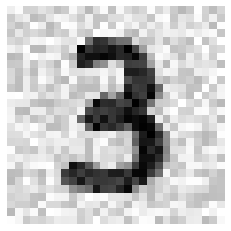

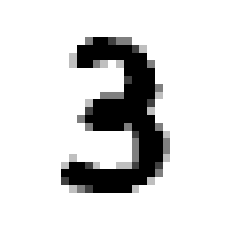

In [124]:
def plot_digit(array):
    array = array.reshape(28,28)
    plt.imshow(array,
              cmap = matplotlib.cm.binary,
              interpolation = 'nearest')
    plt.axis('off')
    plt.show()
    
plot_digit(X_test_mod[4000])
plot_digit(y_test_mod[4000])

## Step 7: Cleaning the array with KNN classifier

Now you need to clean the image using KNN classifier. It is an example of Multioutput classification. A single label is Multilabel as it has 784 classes and each of the 784 pixel can have values from 0 to 255, hence it is a Multioutput classification example.

In [125]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [128]:
clean_digit = knn_clf.predict([X_test_mod[1000]])

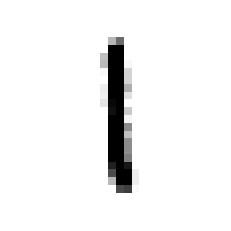

In [130]:
plot_digit(clean_digit)

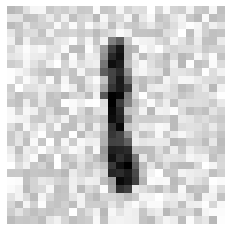

In [131]:
plot_digit(X_test_mod[1000])

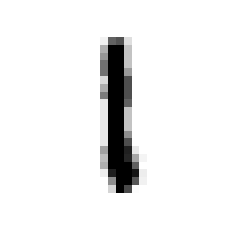

In [132]:
plot_digit(y_test_mod[1000])